## Building a simple network

## Import library packages

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.autograd import Variable

### Create data for our neural network

1. Data preperation : **get_data()** function prepares the tensors (arrays) containing input and output data.

In [6]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

### Create learnable parameters

2. Create learnable parameters : **get_weights()** function provides us with tensors containing random values , which we will optimize to solve our problem.

In [7]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

### Implement Neural Network

3. Network Model : **simple_network()** produces the output for the input data applying a linear rule , multiply weights with input data and add the bias term (y = Wx+b).

In [8]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

### Implement Neural Network in Pytorch

torch.nn is the library to generate the neural network

In [9]:
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
#f = nn.Conv2d(17,1, kernel_size=2) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

In [58]:
import torch
from torchviz import make_dot

x=torch.ones(110, requires_grad=True)
weights = {'x':x}

y=x**2
z=x**3
r=(y+z).sum()
make_dot(r).render("attached", format="png")

'attachedcon.png'

### Implementing Loss Function

4. Loss : **loss_fn()** provides information about how good the model is.

In [11]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data.item

### Implementing Optimizer

5. Optimizer : **optimize()** function helps us in adjusting random weights created initially to help the model calculate target values more accurately.

In [12]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

6. Lets write a function to visualize the prediction

In [13]:
def plot_variable(x,y,z='',**kwargs):
    l = []
    
    for a in [x,y]:
        if type(a) == Variable:
            l.append(a.data.numpy())
        else:
            l.append(a)
    plt.plot(l[0],l[1],z,**kwargs)

In [61]:
x,y = get_data()               # x - represents training data,y - represents target variables
print("x: ", x)
print("y: ", y)

x:  tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 5.6540],
        [ 9.2700],
        [ 3.1000]])
y:  tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
        1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000])


In [62]:
w,b = get_weights()           # w,b - Learnable parameters
print("weights: ", x)
print("biases: ", y)

weights:  tensor([[ 3.3000],
        [ 4.4000],
        [ 5.5000],
        [ 6.7100],
        [ 6.9300],
        [ 4.1680],
        [ 9.7790],
        [ 6.1820],
        [ 7.5900],
        [ 2.1670],
        [ 7.0420],
        [10.7910],
        [ 5.3130],
        [ 7.9970],
        [ 5.6540],
        [ 9.2700],
        [ 3.1000]])
biases:  tensor([1.7000, 2.7600, 2.0900, 3.1900, 1.6940, 1.5730, 3.3660, 2.5960, 2.5300,
        1.2210, 2.8270, 3.4650, 1.6500, 2.9040, 2.4200, 2.9400, 1.3000])


Lets define a learning_rate of 1e-4

In [63]:
learning_rate = 1e-4

In [64]:
for i in range(500):
    y_pred = simple_network(x) # function which computes wx + b
    loss = loss_fn(y,y_pred)   # calculates sum of the squared differences of y and y_pred
    if i % 50 == 0: 
        print(loss)
    optimize(learning_rate)    # Adjust w,b to minimize the loss

<built-in method item of Tensor object at 0x000001AB80963880>
<built-in method item of Tensor object at 0x000001ABF9D59530>
<built-in method item of Tensor object at 0x000001AB807E5AD0>
<built-in method item of Tensor object at 0x000001AB807E5AD0>
<built-in method item of Tensor object at 0x000001AB80963880>
<built-in method item of Tensor object at 0x000001ABF9D59530>
<built-in method item of Tensor object at 0x000001ABF9D59530>
<built-in method item of Tensor object at 0x000001AB807E5AD0>
<built-in method item of Tensor object at 0x000001AB80963880>
<built-in method item of Tensor object at 0x000001AB80963880>


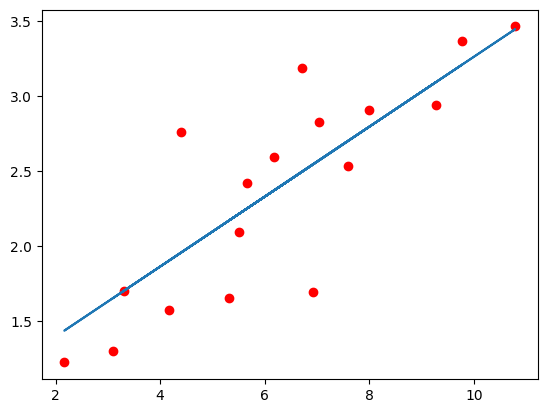

In [65]:
x_numpy = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred.detach().numpy(),label='Fitted line')
#plt.legend()

## iris data set example

In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

import iris

In [22]:
import numpy as np
import pandas as pd
from torch.utils.data.dataset import Dataset


label_idx = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


class IrisDataset(Dataset):

    def __init__(self, data):
        self.data = data
           
    def __getitem__(self, index):
        item = self.data.iloc[index].values
        return (item[0:4].astype(np.float32), np.int64(item[4]))

    def __len__(self):
        return self.data.shape[0]


def get_datasets(iris_file, train_ratio=0.80):

    labels = {'class': label_idx}
    data = pd.read_csv(iris_file)
    data.replace(labels, inplace=True)

    train_df = data.sample(frac=train_ratio, random_state=3)
    test_df = data.loc[~data.index.isin(train_df.index), :]

    return IrisDataset(train_df), IrisDataset(test_df)

In [23]:
import pandas as pd
ir = pd.read_csv('../data/iris.data.txt', sep=',')
ir.head(20)

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0               5.1             3.5              1.4             0.2   
1               4.9             3.0              1.4             0.2   
2               4.7             3.2              1.3             0.2   
3               4.6             3.1              1.5             0.2   
4               5.0             3.6              1.4             0.2   
5               5.4             3.9              1.7             0.4   
6               4.6             3.4              1.4             0.3   
7               5.0             3.4              1.5             0.2   
8               4.4             2.9              1.4             0.2   
9               4.9             3.1              1.5             0.1   
10              5.4             3.7              1.5             0.2   
11              4.8             3.4              1.6             0.2   
12              4.8             3.0              1.4             0.1   
13              4.3             3.0              1.1             0.1   
14              5.8             4.0              1.2             0.2   
15              5.7             4.4              1.5             0.4   
16              5.4             3.9              1.3             0.4   
17              5.1             3.5              1.4             0.3   
18              5.7             3.8              1.7             0.3   
19              5.1             3.8              1.5             0.3   

          class  
0   Iris-setosa  
1   Iris-setosa  
2   Iris-setosa  
3   Iris-setosa  
4   Iris-setosa  
5   Iris-setosa  
6   Iris-setosa  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa  
12  Iris-setosa  
13  Iris-setosa  
14  Iris-setosa  
15  Iris-setosa  
16  Iris-setosa  
17  Iris-setosa  
18  Iris-setosa  
19  Iris-setosa

### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [16]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

**Print the module**

In [17]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


### Create the DataLoader

In [30]:
batch_size = 60
iris_data_file = '../data/iris.data.txt'

In [31]:
# Get the datasets
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# Create the dataloaders - for training and validation/testing
# We will be using the term validation and testing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


In [6]:
for i, (items, classes) in enumerate(train_loader):
    print("item: ", Variable(items))
    print("classes: ", Variable(classes))


item:  tensor([[6.3000, 2.5000, 4.9000, 1.5000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.4000, 3.0000, 1.

### Instantiate the network, the loss function and the optimizer

In [77]:
### Instantiate the network, the loss function and the optimizer
# Our model
net = IrisNet(4, 100, 50, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

In [7]:
### Instantiate the network, the loss function and the optimizer if cuda
# Our model cuda
net = IrisNet(4, 100, 50, 3).cuda()

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

In [79]:


# Our model
net = IrisNet(4, 100, 50, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

# Our model cuda
net = IrisNet(4, 100, 50, 3).cuda()

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

### Train it!

In [80]:
num_epochs = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items)
        classes = Variable(classes)
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data.item()))
        #print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
        #       %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data.item())
    #train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    #test_loss.append(loss.data[0])
    test_loss.append(loss.data.item())
    
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

Epoch 1/500, Iteration 1/2, Loss: 1.0809
Epoch 1/500, Iteration 2/2, Loss: 1.0404
Epoch 2/500, Iteration 1/2, Loss: 1.0091
Epoch 2/500, Iteration 2/2, Loss: 1.0976
Epoch 3/500, Iteration 1/2, Loss: 1.0292
Epoch 3/500, Iteration 2/2, Loss: 1.0573
Epoch 4/500, Iteration 1/2, Loss: 1.0148
Epoch 4/500, Iteration 2/2, Loss: 1.0473
Epoch 5/500, Iteration 1/2, Loss: 1.0204
Epoch 5/500, Iteration 2/2, Loss: 1.0148
Epoch 6/500, Iteration 1/2, Loss: 1.0331
Epoch 6/500, Iteration 2/2, Loss: 0.9783
Epoch 7/500, Iteration 1/2, Loss: 0.9954
Epoch 7/500, Iteration 2/2, Loss: 0.9908
Epoch 8/500, Iteration 1/2, Loss: 0.9921
Epoch 8/500, Iteration 2/2, Loss: 0.9716
Epoch 9/500, Iteration 1/2, Loss: 0.9792
Epoch 9/500, Iteration 2/2, Loss: 0.9628
Epoch 10/500, Iteration 1/2, Loss: 0.9634
Epoch 10/500, Iteration 2/2, Loss: 0.9575
Epoch 11/500, Iteration 1/2, Loss: 0.9470
Epoch 11/500, Iteration 2/2, Loss: 0.9525
Epoch 12/500, Iteration 1/2, Loss: 0.9499
Epoch 12/500, Iteration 2/2, Loss: 0.9309
Epoch 13/5

Epoch 119/500, Iteration 2/2, Loss: 0.3768
Epoch 120/500, Iteration 1/2, Loss: 0.3795
Epoch 120/500, Iteration 2/2, Loss: 0.3732
Epoch 121/500, Iteration 1/2, Loss: 0.3685
Epoch 121/500, Iteration 2/2, Loss: 0.3794
Epoch 122/500, Iteration 1/2, Loss: 0.3859
Epoch 122/500, Iteration 2/2, Loss: 0.3581
Epoch 123/500, Iteration 1/2, Loss: 0.3433
Epoch 123/500, Iteration 2/2, Loss: 0.3966
Epoch 124/500, Iteration 1/2, Loss: 0.3654
Epoch 124/500, Iteration 2/2, Loss: 0.3703
Epoch 125/500, Iteration 1/2, Loss: 0.3863
Epoch 125/500, Iteration 2/2, Loss: 0.3462
Epoch 126/500, Iteration 1/2, Loss: 0.3697
Epoch 126/500, Iteration 2/2, Loss: 0.3591
Epoch 127/500, Iteration 1/2, Loss: 0.4055
Epoch 127/500, Iteration 2/2, Loss: 0.3188
Epoch 128/500, Iteration 1/2, Loss: 0.3755
Epoch 128/500, Iteration 2/2, Loss: 0.3451
Epoch 129/500, Iteration 1/2, Loss: 0.3694
Epoch 129/500, Iteration 2/2, Loss: 0.3472
Epoch 130/500, Iteration 1/2, Loss: 0.3210
Epoch 130/500, Iteration 2/2, Loss: 0.3925
Epoch 131/5

Epoch 232/500, Iteration 2/2, Loss: 0.1942
Epoch 233/500, Iteration 1/2, Loss: 0.2039
Epoch 233/500, Iteration 2/2, Loss: 0.1912
Epoch 234/500, Iteration 1/2, Loss: 0.2116
Epoch 234/500, Iteration 2/2, Loss: 0.1815
Epoch 235/500, Iteration 1/2, Loss: 0.1965
Epoch 235/500, Iteration 2/2, Loss: 0.1947
Epoch 236/500, Iteration 1/2, Loss: 0.2094
Epoch 236/500, Iteration 2/2, Loss: 0.1797
Epoch 237/500, Iteration 1/2, Loss: 0.1804
Epoch 237/500, Iteration 2/2, Loss: 0.2069
Epoch 238/500, Iteration 1/2, Loss: 0.2044
Epoch 238/500, Iteration 2/2, Loss: 0.1808
Epoch 239/500, Iteration 1/2, Loss: 0.1691
Epoch 239/500, Iteration 2/2, Loss: 0.2142
Epoch 240/500, Iteration 1/2, Loss: 0.1812
Epoch 240/500, Iteration 2/2, Loss: 0.2002
Epoch 241/500, Iteration 1/2, Loss: 0.1910
Epoch 241/500, Iteration 2/2, Loss: 0.1887
Epoch 242/500, Iteration 1/2, Loss: 0.2075
Epoch 242/500, Iteration 2/2, Loss: 0.1703
Epoch 243/500, Iteration 1/2, Loss: 0.2073
Epoch 243/500, Iteration 2/2, Loss: 0.1701
Epoch 244/5

Epoch 346/500, Iteration 1/2, Loss: 0.1618
Epoch 346/500, Iteration 2/2, Loss: 0.0945
Epoch 347/500, Iteration 1/2, Loss: 0.1319
Epoch 347/500, Iteration 2/2, Loss: 0.1227
Epoch 348/500, Iteration 1/2, Loss: 0.1202
Epoch 348/500, Iteration 2/2, Loss: 0.1338
Epoch 349/500, Iteration 1/2, Loss: 0.1397
Epoch 349/500, Iteration 2/2, Loss: 0.1135
Epoch 350/500, Iteration 1/2, Loss: 0.1363
Epoch 350/500, Iteration 2/2, Loss: 0.1162
Epoch 351/500, Iteration 1/2, Loss: 0.1419
Epoch 351/500, Iteration 2/2, Loss: 0.1103
Epoch 352/500, Iteration 1/2, Loss: 0.1039
Epoch 352/500, Iteration 2/2, Loss: 0.1491
Epoch 353/500, Iteration 1/2, Loss: 0.1491
Epoch 353/500, Iteration 2/2, Loss: 0.1014
Epoch 354/500, Iteration 1/2, Loss: 0.1084
Epoch 354/500, Iteration 2/2, Loss: 0.1415
Epoch 355/500, Iteration 1/2, Loss: 0.1169
Epoch 355/500, Iteration 2/2, Loss: 0.1321
Epoch 356/500, Iteration 1/2, Loss: 0.1741
Epoch 356/500, Iteration 2/2, Loss: 0.0756
Epoch 357/500, Iteration 1/2, Loss: 0.1128
Epoch 357/5

Epoch 442/500, Iteration 1/2, Loss: 0.1255
Epoch 442/500, Iteration 2/2, Loss: 0.0823
Epoch 443/500, Iteration 1/2, Loss: 0.0870
Epoch 443/500, Iteration 2/2, Loss: 0.1195
Epoch 444/500, Iteration 1/2, Loss: 0.1062
Epoch 444/500, Iteration 2/2, Loss: 0.1005
Epoch 445/500, Iteration 1/2, Loss: 0.1019
Epoch 445/500, Iteration 2/2, Loss: 0.1047
Epoch 446/500, Iteration 1/2, Loss: 0.1140
Epoch 446/500, Iteration 2/2, Loss: 0.0916
Epoch 447/500, Iteration 1/2, Loss: 0.1083
Epoch 447/500, Iteration 2/2, Loss: 0.0973
Epoch 448/500, Iteration 1/2, Loss: 0.1280
Epoch 448/500, Iteration 2/2, Loss: 0.0774
Epoch 449/500, Iteration 1/2, Loss: 0.1174
Epoch 449/500, Iteration 2/2, Loss: 0.0872
Epoch 450/500, Iteration 1/2, Loss: 0.1105
Epoch 450/500, Iteration 2/2, Loss: 0.0940
Epoch 451/500, Iteration 1/2, Loss: 0.0984
Epoch 451/500, Iteration 2/2, Loss: 0.1067
Epoch 452/500, Iteration 1/2, Loss: 0.1291
Epoch 452/500, Iteration 2/2, Loss: 0.0778
Epoch 453/500, Iteration 1/2, Loss: 0.1399
Epoch 453/5

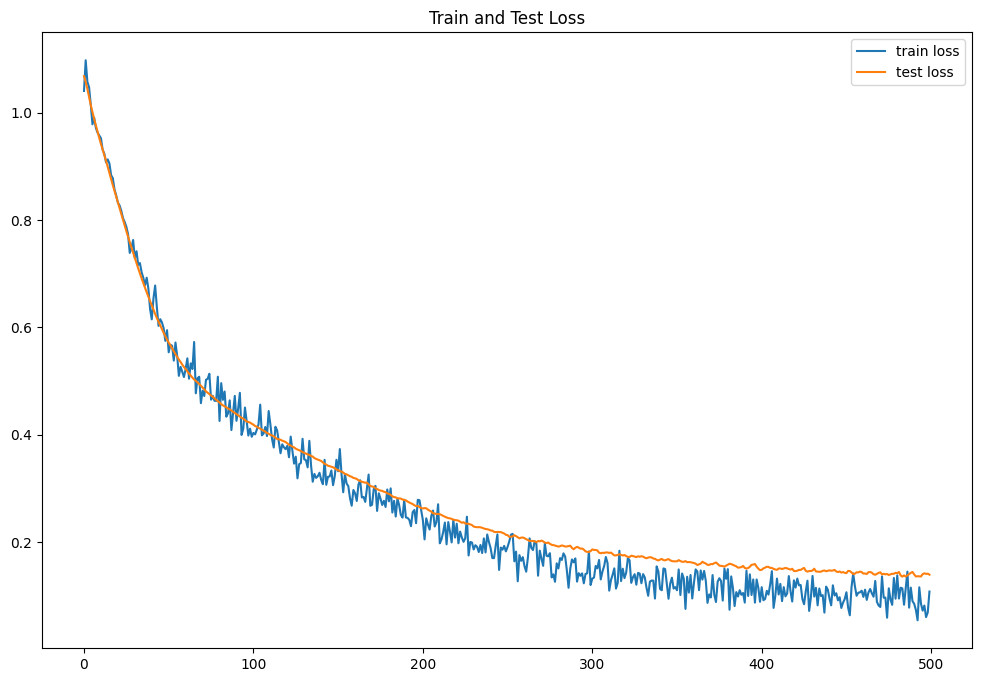

In [81]:
## Plot loss vs iterations

fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

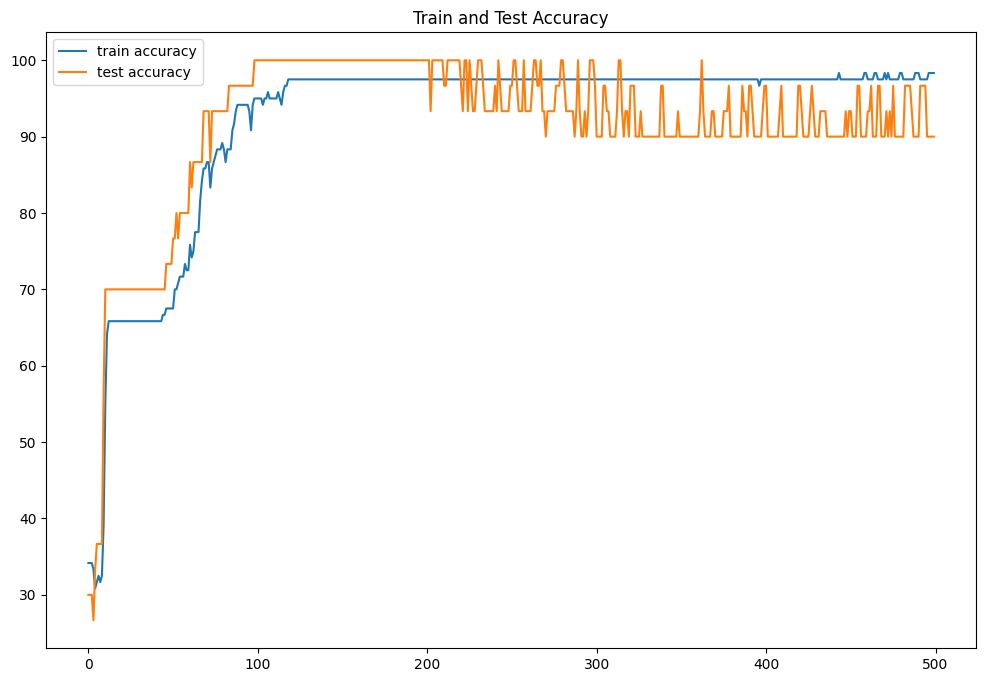

In [82]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title("Train and Test Accuracy")
plt.legend()
plt.show()

### Savign the model to disk, and loading it back

In [83]:
torch.save(net.state_dict(), "./my_model.pth")

In [84]:
net2 = IrisNet(4, 100, 50, 3)
net2.load_state_dict(torch.load("./my_model.pth"))

<All keys matched successfully>

In [90]:
output = net2(Variable(torch.FloatTensor([[7.0,3.2,4.7,1.4]])))

In [91]:
_, predicted_class = torch.max(output.data, 1)
print('Predicted class: ', predicted_class.numpy()[0])
print('Expected class: ', 0 )

Predicted class:  1
Expected class:  0


## If Cuda

In [ ]:
# cuda
num_epochs = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items.cuda())
        classes = Variable(classes.cuda())
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data.item()))
        #print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
        #       %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data[0]))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data.item())
    #train_loss.append(loss.data[0])

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items.cuda()))
    loss = criterion(outputs, Variable(test_classes.cuda()))
    #test_loss.append(loss.data[0])
    test_loss.append(loss.data.item())
    #Record the testing accuracy
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes.cuda()).sum()
    test_accuracy.append((100 * correct / total))